Ejemplo de redes neuronales de reconocimiento de perros y gatos

In [2]:
from tensorflow import keras

Descarga de las imágenes. No hay que ejecutarlo de nuevo.

In [3]:
import requests
import zipfile
import os

# URL del conjunto de datos
url = "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip"
local_zip_file = "kagglecatsanddogs_5340.zip"

# Descargar el archivo
response = requests.get(url)
with open(local_zip_file, 'wb') as file:
    file.write(response.content)

# Descomprimir el archivo
with zipfile.ZipFile(local_zip_file, 'r') as zip_ref:
    zip_ref.extractall(".")

# Eliminar el archivo zip descargado
os.remove(local_zip_file)


KeyboardInterrupt: 

Limpieza de los datos

In [4]:
DATASET_PATH = 'PetImages'

### Explicación general

El siguiente bloque tiene como objetivo **filtrar imágenes** en dos carpetas (`Cat` y `Dog`), eliminando aquellas que **no están en formato JPEG**. El proceso principal es el siguiente:

1. **Recorrido de carpetas**: Se iteran las carpetas `Cat` y `Dog` para acceder a las imágenes en su interior.
2. **Comprobación del formato de las imágenes**: 
   - Para cada imagen, se abre el archivo en modo de lectura binaria y se verifican los primeros 10 bytes.
   - Si estos bytes contienen la cadena `"JFIF"`, significa que la imagen está en formato **JPEG**.
3. **Eliminación de imágenes no JPEG**:
   - Si una imagen no contiene la cadena `"JFIF"` en los primeros 10 bytes, se considera que no está en formato JPEG y se procede a eliminarla del sistema.
4. **Contador de imágenes eliminadas**: Se lleva un registro del número de imágenes eliminadas y se imprime al final.

#### Uso de TensorFlow
Se utiliza la función `tf.compat.as_bytes()` de TensorFlow para convertir la cadena `"JFIF"` a una representación binaria, lo que permite buscarla dentro de los primeros bytes de las imágenes de forma eficiente.

#### Operaciones de archivos
- `os.listdir()` se usa para listar los archivos dentro de cada carpeta.
- `os.remove()` se utiliza para eliminar los archivos que no cumplen con el formato esperado.


In [5]:
import tensorflow as tf  # Importamos la librería TensorFlow, que usaremos para trabajar con imágenes
import os  # Importamos el módulo os para manejar operaciones relacionadas con el sistema de archivos

# Definimos la función 'filter_images' que se encarga de eliminar imágenes que no están en formato JPEG
def filter_images():
    deleted_imgs = 0  # Inicializamos un contador para llevar registro del número de imágenes eliminadas
    # Iteramos sobre los nombres de las carpetas "Cat" y "Dog"
    for folder_name in ("Cat", "Dog"):
        # Obtenemos la ruta completa de cada carpeta
        folder_path = os.path.join(DATASET_PATH, folder_name)
        # Iteramos sobre cada archivo (imagen) dentro de la carpeta correspondiente
        for image in os.listdir(folder_path):
            img_path = os.path.join(folder_path, image)  # Construimos la ruta completa de la imagen
            try:
                # Abrimos el archivo de imagen en modo de solo lectura ("rb" = lectura binaria)
                fobj = open(img_path, "rb")
                # Comprobamos si los primeros 10 bytes contienen la cadena "JFIF", 
                # que indica que la imagen está en formato JPEG
                is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
            finally:
                # Cerramos el archivo después de la comprobación, sin importar si hubo error o no
                fobj.close()
            # Si la imagen no es JPEG (no contiene "JFIF"), la eliminamos
            if not is_jfif:
                deleted_imgs += 1  # Incrementamos el contador de imágenes eliminadas
                os.remove(img_path)  # Eliminamos la imagen no válida
    # Imprimimos el número total de imágenes eliminadas al final del proceso
    print(f"Imágenes eliminadas: {deleted_imgs}")

### Introducción Teórica de Métodos Utilizados en la Función `filter_images`

#### 1. `import tensorflow as tf`
TensorFlow es una biblioteca de código abierto para el aprendizaje automático y el procesamiento de datos. Permite a los desarrolladores crear y entrenar modelos de aprendizaje profundo y realizar tareas de computación numérica. La función `tf.compat.as_bytes()` se utiliza para convertir cadenas de texto en bytes, lo cual es útil para realizar operaciones en datos binarios, como en el caso de la verificación del formato de imagen.

**Referencia**: [Documentación de TensorFlow](https://www.tensorflow.org/api_docs/python/tf/compat/v1/as_bytes)

#### 2. `import os`
El módulo `os` proporciona una manera de utilizar funcionalidades dependientes del sistema operativo, como la manipulación de rutas de archivos y la interacción con el sistema de archivos. Permite realizar operaciones como listar directorios, construir rutas de archivos y eliminar archivos.

**Referencia**: [Documentación de `os`](https://docs.python.org/3/library/os.html)

#### 3. `os.path.join()`
`os.path.join()` es un método que se utiliza para unir uno o más componentes de una ruta de archivo de manera que sea compatible con el sistema operativo. Este método se asegura de que se utilicen los separadores de ruta correctos, lo que lo hace especialmente útil para construir rutas de manera segura y evitar errores en diferentes sistemas operativos.

**Referencia**: [Documentación de `os.path.join()`](https://docs.python.org/3/library/os.path.html#os.path.join)

#### 4. `os.listdir()`
`os.listdir()` es un método que devuelve una lista de los nombres de las entradas en un directorio dado. Este método permite a los usuarios obtener una lista de archivos y carpetas en una ubicación específica, lo que es útil para iterar sobre los elementos de un directorio.

**Referencia**: [Documentación de `os.listdir()`](https://docs.python.org/3/library/os.html#os.listdir)

#### 5. `open()`
La función `open()` se utiliza para abrir un archivo y devolver un objeto de archivo. Este objeto permite realizar operaciones de lectura, escritura y manipulación en el archivo. El modo de apertura del archivo se especifica como un argumento (por ejemplo, `"rb"` para lectura en binario). La apertura de archivos en modo binario es crucial al trabajar con imágenes, ya que garantiza que los datos se manejen correctamente.

**Referencia**: [Documentación de `open()`](https://docs.python.org/3/library/functions.html#open)

#### 6. `fobj.peek(size)`
El método `peek(size)` de un objeto de archivo permite leer una cantidad específica de bytes desde el principio del archivo sin mover el puntero de archivo. Esto es útil para inspeccionar los datos en un archivo y, en este caso, para verificar si los primeros bytes de la imagen indican que está en formato JPEG.

**Referencia**: [Documentación de `file.peek()`](https://docs.python.org/3/library/io.html#io.IOBase.peek)

#### 7. `os.remove()`
`os.remove()` es un método que se utiliza para eliminar un archivo en el sistema de archivos. Se debe proporcionar la ruta completa del archivo que se desea eliminar. Este método es útil para limpiar archivos no deseados o temporales, como en el caso de eliminar imágenes que no cumplen con los requisitos de formato.

**Referencia**: [Documentación de `os.remove()`](https://docs.python.org/3/library/os.html#os.remove)

### Conclusión
Estos métodos y funciones son componentes clave en la manipulación de archivos y datos en Python, y su uso conjunto en la función `filter_images` permite gestionar y filtrar imágenes de manera efectiva, asegurando que solo se conserven aquellas en formato JPEG.


In [6]:
filter_images()

Imágenes eliminadas: 0


Explorando las imágenes

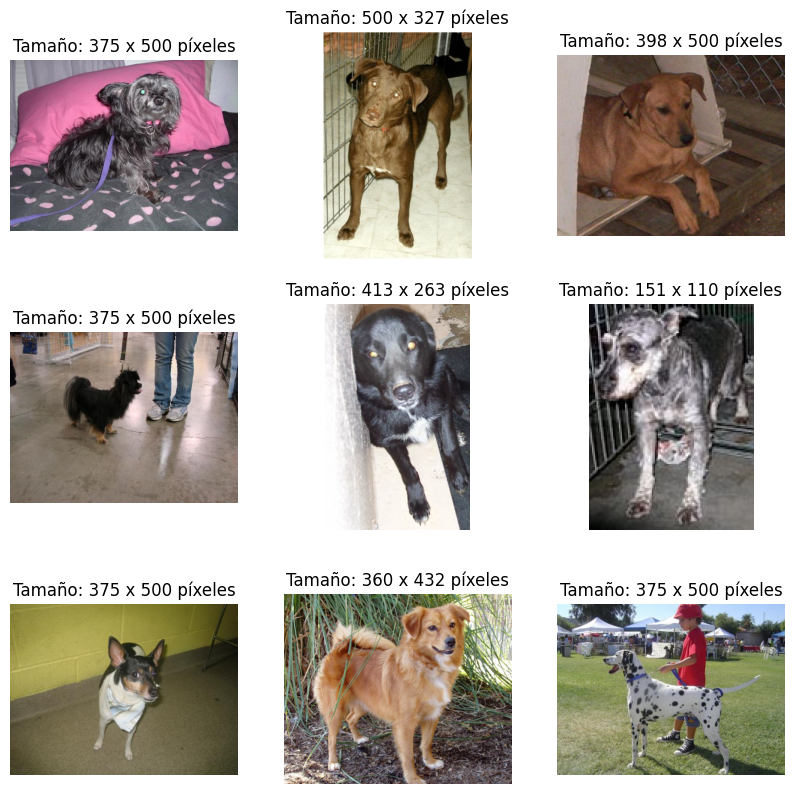

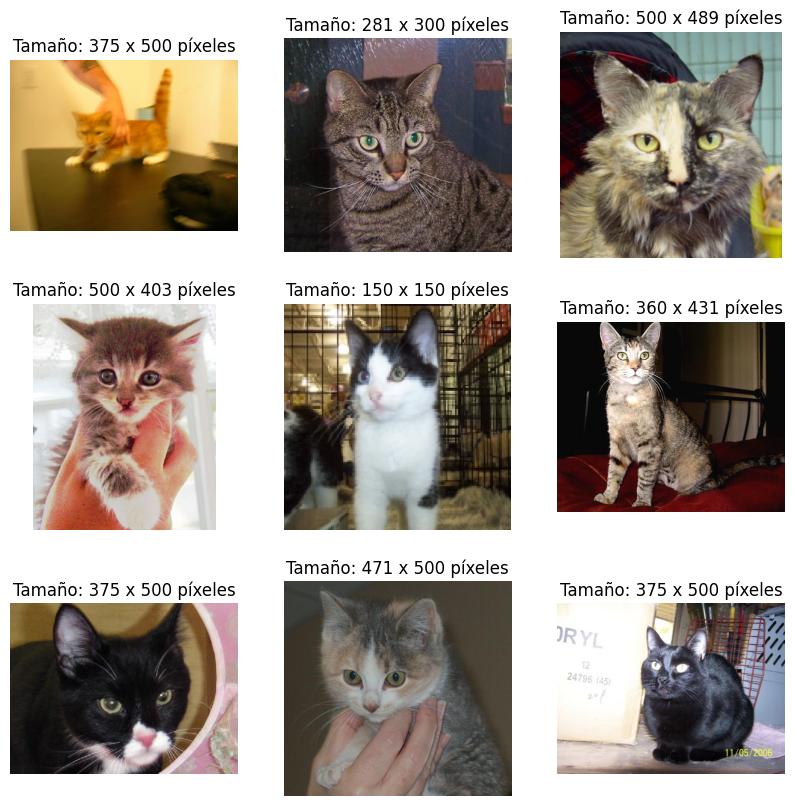

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

for animal in ("Dog","Cat"):
  plt.figure(figsize=(10, 10))

  folder_path = os.path.join(DATASET_PATH, animal)
  for i, image in enumerate(os.listdir(folder_path)[:9]):
    img_path = os.path.join(folder_path, image)
    img = mpimg.imread(img_path)
    ax = plt.subplot(3, 3, i + 1) # (nrows, ncols, index)
    plt.imshow(img)
    plt.title(f"Tamaño: {img.shape[:2][0]} x {img.shape[:2][1]} píxeles")
    plt.axis("off")

  plt.show()

Como se puede observar las imágenes tienen diversos tamaños. Por lo que hay que normalizarlas.  
Keras nos permite normalizar el tamaño de las imágenes de nuestro conjunto de datos haciendo uso de funciones auxiliares que convierten los datos a un objeto Dataset de los diferentes backends que estemos utilizando.

Tensorflow: https://www.tensorflow.org/api_docs/python/tf/data/Dataset

Keras permite construir un objeto dataset del backend elegido, en este caso Tensorflow.  
La función clasifica las imágenes según el nombre de la carpeta en la que estén

In [7]:
image_size = (180, 180)
batch_size = 16 # Tamaño de lote

train_ds = keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,  # 20% de los datos forman parte del subconjunto de validación
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 23422 files belonging to 2 classes.
Using 18738 files for training.


La variable train_ds guarda el subconjunto de imágenes de entrenamiento, que son 80% del total

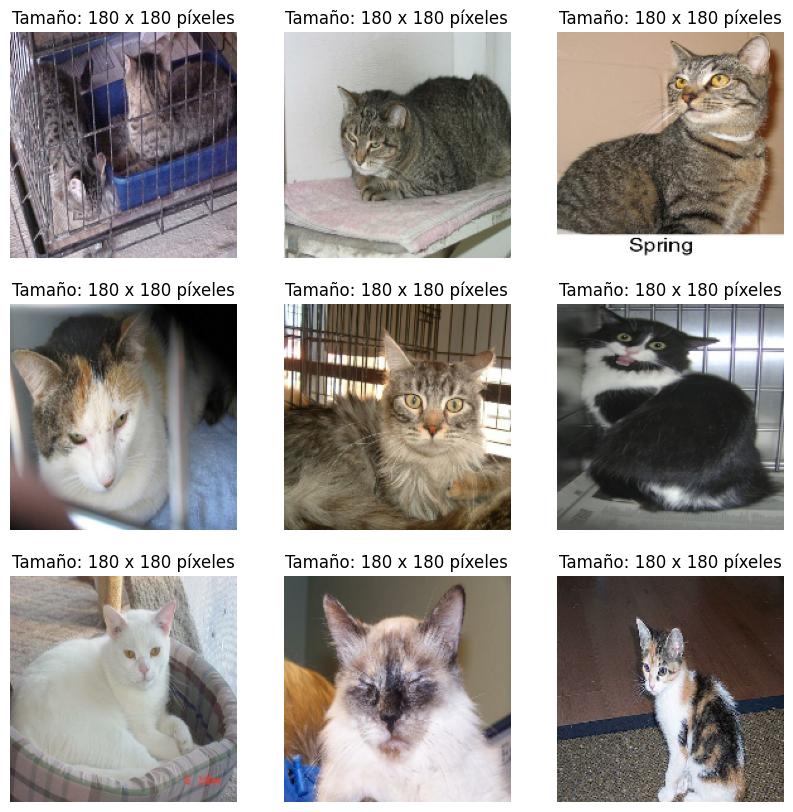

In [8]:
plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1): # take(1) obtiene un lote del conjunto de datos (128 ejemplos)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Tamaño: {images[i].shape[0]} x {images[i].shape[1]} píxeles")
        plt.axis("off")

plt.show()

Ahora obtenemos el conjunto de datos de validación, usando la misma función que con la que obtuvimos el de entrenamiento

In [8]:
image_size = (180, 180)
batch_size = 16 # Tamaño de lote

temp_val_ds = keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,  # 20% de los datos forman parte del subconjunto de validación
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 23422 files belonging to 2 classes.
Using 4684 files for validation.


Ahora es preciso dividir el subconjunto de validación (temp_val_ds) en 2 subconjuntos, de los cuales uno se mantendrá como validación y el otro será el de prueba

In [9]:
val_size = int(0.5*len(temp_val_ds)) # me devuelve la cantidad total de lotes que tendrá el conjunto de validación definitivo, que es aproximadamente la mitad
val_size

146

In [10]:
val_ds = temp_val_ds.take(val_size)
test_ds = temp_val_ds.skip(val_size)

In [11]:
len(val_ds)

146

In [12]:
len(test_ds)

147

#### `A continuación se entrena una red neuronal sencilla y básica, luego se entrenará una más robusta y adecuada.`

Definición de la Red Neuronal

El bloque básico que utiliza Keras es la `layer` o capa.

La red Neuronal estará formada por diferentes capas que a su vez contendrán un conjunto de neuronas. El número de neuronas se corresponde con el primer parámetro que se le proporciona a la capa.

Vamos a comenzar definiendo una arquitectura muy sencilla. Se corresponde con una Red Neuronal Artificial densamente conectada con lo siguientes componentes:
* La primera capa estará formada por 384 neuronas
* La segunda capa estará formada por 256 neuronas
* La tercera capa estará formadad por 128 neuronas
* La última capa estará formada por 1 neurona

Diagrama: https://alexlenail.me/NN-SVG/index.html

In [33]:
from keras import layers

input_shape = (180,180,3) # Tupla que representa la dimensión de las imagenes

fcnn_model = keras.Sequential() # Modelo secuencial: preparar el "espacio" donde se van a ubicar las capas de redes neuronales

# Entrada de la red neuronal, especificando la forma de los datos de entrada con shape=input_shape
fcnn_model.add(layers.Input(shape=input_shape))

#Escalamos o normalizamos las imágenes
fcnn_model.add(layers.Rescaling(1.0/255))

# Aplana las imágenes para la primera capa densa
fcnn_model.add(layers.Flatten())

# Layer 1
fcnn_model.add(layers.Dense(384, activation='relu'))

# Layer 2
fcnn_model.add(layers.Dense(256, activation='relu'))

# Layer 3
fcnn_model.add(layers.Dense(128, activation='relu'))

# Layer 4
fcnn_model.add(layers.Dense(1, activation='sigmoid')) # si quisiera clasificar múltiples clases se utiliza  la función de activación softmax en esta última capa

Resumen de la red definida

In [34]:
fcnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 flatten (Flatten)           (None, 97200)             0         
                                                                 
 dense (Dense)               (None, 384)               37325184  
                                                                 
 dense_1 (Dense)             (None, 256)               98560     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 37,456,769
Trainable params: 37,456,769
No

Ahora toca compilar todo lo definido, agregando nuevos parámetros a la red neuronal, como función de error y función de optimización

In [35]:
fcnn_model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(1e-3), metrics=['accuracy'])

Entrenamiento de la Red Neuronal

Definimos un early_stopping, que no es más que un parámetro que detecta cuándo los epoch comienzan a ser innecesarios y redundantes. Aunque se le definanan 100 epoch al entrenamiento, si a partir de un número bajo (15, por ejemplo) ya deja de mejorar una métrica definida, los epoch se detienen-

In [13]:
from keras import callbacks

# Define el callback de EarlyStopping
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',  # Métrica a monitorear
    patience=3,          # Número de epochs sin mejora antes de detenerse
    restore_best_weights=True  # Restaurar los pesos del mejor epoch al detenerse
)

En la variable ***history*** se almacenan varios valores importantes:
* El valor de los parámetros del modelo después del entrenamiento
* La lista de *epochs* llevados a cabo
* Un diccionario con el error producido en cada *epoch* en el conjunto de datos de entreanamiento y validación

In [38]:
history = fcnn_model.fit(train_ds, epochs=100, validation_data=val_ds, callbacks=early_stopping)

Epoch 1/100
147/147 [==============================] - 12s 79ms/step - loss: 0.6629 - accuracy: 0.5917 - val_loss: 0.6569 - val_accuracy: 0.6068
Epoch 2/100
147/147 [==============================] - 11s 75ms/step - loss: 0.6626 - accuracy: 0.6002 - val_loss: 0.6529 - val_accuracy: 0.6146
Epoch 3/100
147/147 [==============================] - 13s 87ms/step - loss: 0.6583 - accuracy: 0.6067 - val_loss: 0.6729 - val_accuracy: 0.5859
Epoch 4/100
147/147 [==============================] - 13s 84ms/step - loss: 0.6562 - accuracy: 0.6110 - val_loss: 0.6755 - val_accuracy: 0.5864
Epoch 5/100
147/147 [==============================] - 13s 82ms/step - loss: 0.6642 - accuracy: 0.5984 - val_loss: 0.6490 - val_accuracy: 0.6241
Epoch 6/100
147/147 [==============================] - 12s 82ms/step - loss: 0.6539 - accuracy: 0.6165 - val_loss: 0.6489 - val_accuracy: 0.6289
Epoch 7/100
147/147 [==============================] - 12s 80ms/step - loss: 0.6548 - accuracy: 0.6193 - val_loss: 0.6669 - val_ac

### 7.1. ¿Qué cosas podemos mejorar?

Cuando los resultados que obtenemos no son lo suficientemente buenos, debemos centrarnos en iterar sobre diferentes componentes de nuestro proyecto:


1.   **Conjunto de datos**: Es posible que los datos obtenidos no sea suficiente de calidad o no sean suficientes. Podemos aplicar técnicas para aumentar el tamaño de nuestro conjunto de datos.
2.   **Arquitectura de la Red Neuronal**: La arquitectura de la Red Neuronal Artificial puede no ser adecuada para el problema que queremos resolver.
3.   **Configuración de la Red Neuronal**: La configuración de la Red Neuronal Artificial puede no ser adecuada para el problema y la arquitectura seleccionadas.

### 7.2. Aumento del conjunto de datos (Data Augmentation)

`Data augmentation`, o aumento de datos, es una técnica utilizada comúnmente en aprendizaje automático y visión artificial para mejorar el rendimiento de un modelo mediante la generación de variaciones artificiales en los datos de entrenamiento.

El objetivo principal es ampliar el conjunto de datos de entrenamiento, proporcionando más diversidad y variabilidad para que el modelo pueda aprender patrones más robustos y generalizar mejor a datos nuevos.

#### `A continuación se entrena una red neuronal con mejoras hechas y mejor rendimiento`

Primero aumentamos el conjunto de datos con ciertas transformaciones, usando un objeto Sequential de Keras. 

In [14]:
from keras import layers
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

Aplicamos los cambios al dataset completo

In [15]:
import tensorflow as tf

# Aplicamos "data augmentation" al conjunto de datos de entrenamiento
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf.data.AUTOTUNE,
)

### Resumen de Data Augmentation en el Código Proporcionado

- **Objetivo**: El objetivo del *data augmentation* en este caso no es duplicar o triplicar el conjunto de datos, sino aplicar **transformaciones aleatorias** (como volteo horizontal y rotación) a las imágenes **en tiempo real** durante el entrenamiento.
  
- **Transformaciones aplicadas**:
  - `layers.RandomFlip("horizontal")`: Aplica un **volteo horizontal** aleatorio.
  - `layers.RandomRotation(0.1)`: Aplica una **rotación aleatoria** de hasta un 10% (0.1 radianes).

- **Cómo funciona**:
  - **No** se generan copias adicionales físicas de las imágenes en el conjunto de datos.
  - Cada vez que una imagen es procesada durante el entrenamiento, se le aplican transformaciones **aleatorias**.
  - Esto significa que el modelo puede ver versiones diferentes de la misma imagen en distintas épocas de entrenamiento.

- **Ejemplo**:
  - La **imagen original A** podría:
    - En la **época 1**, verse con un **volteo horizontal**.
    - En la **época 2**, verse con una **rotación** del 10%.
    - En la **época 3**, no tener ninguna transformación o recibir ambas.

- **Beneficio**:
  - El uso de *data augmentation* ayuda a que el modelo **generalice mejor**, ya que aprende de imágenes con variaciones.
  - Esto reduce el riesgo de **sobreajuste** y mejora su rendimiento en datos no vistos.


Definiendo la red neuronal usando el API Funcional de Keras

In [16]:
def make_model(input_shape, num_classes):

    inputs = keras.Input(shape=input_shape)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(inputs)
    x = layers.Conv2D(128, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(previous_block_activation)
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)

Invocamos el modelo

In [17]:
xception = make_model(input_shape=(180, 180, 3), num_classes=2)

In [18]:
xception.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 180, 180, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 90, 90, 128)  3584        ['rescaling[0][0]']              
                                                                                                  
 batch_normalization (BatchNorm  (None, 90, 90, 128)  512        ['conv2d[0][0]']             

Configuración y entrenamiento de la Red Neuronal

In [19]:
# Compilamos el modelo
xception.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(1e-3), metrics=['accuracy'])

In [22]:
history = xception.fit(train_ds, epochs=10, validation_data=val_ds, callbacks=early_stopping)

Epoch 1/10
1172/1172 [==============================] - 366s 306ms/step - loss: 0.6617 - accuracy: 0.6227 - val_loss: 0.5687 - val_accuracy: 0.7295
Epoch 2/10
1172/1172 [==============================] - 358s 305ms/step - loss: 0.5670 - accuracy: 0.7069 - val_loss: 0.5106 - val_accuracy: 0.7658
Epoch 3/10
1172/1172 [==============================] - 325s 277ms/step - loss: 0.4799 - accuracy: 0.7736 - val_loss: 0.5423 - val_accuracy: 0.7611
Epoch 4/10
1172/1172 [==============================] - 325s 277ms/step - loss: 0.3996 - accuracy: 0.8226 - val_loss: 0.3783 - val_accuracy: 0.8313
Epoch 5/10
1172/1172 [==============================] - 326s 278ms/step - loss: 0.3359 - accuracy: 0.8571 - val_loss: 0.3469 - val_accuracy: 0.8506
Epoch 6/10
1172/1172 [==============================] - 324s 277ms/step - loss: 0.2964 - accuracy: 0.8731 - val_loss: 0.2589 - val_accuracy: 0.8934
Epoch 7/10
1172/1172 [==============================] - 324s 276ms/step - loss: 0.2701 - accuracy: 0.8863 - val_

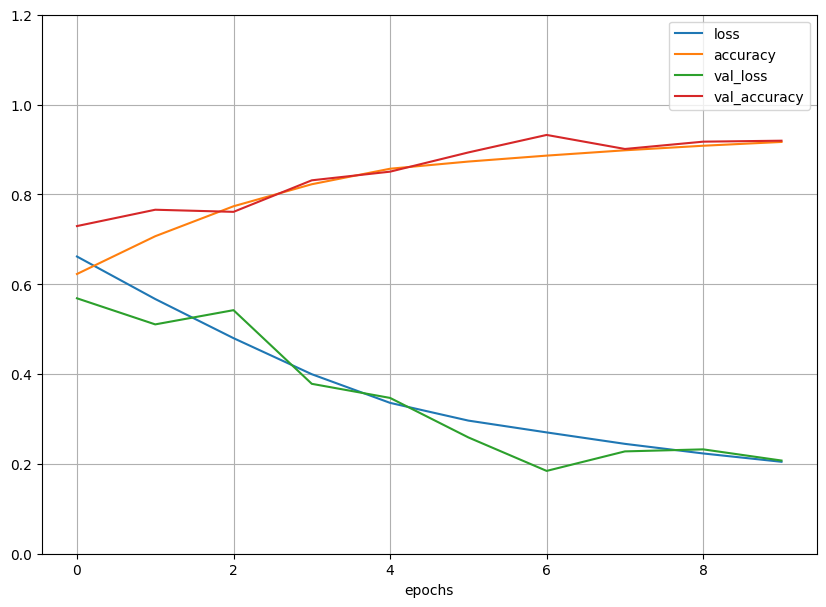

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1.2)
plt.xlabel("epochs")
plt.show()

Evaluacion de resultados con el dataset de prueba

In [24]:
# Evaluacmos el modelo con el conjunto de datos de pruebas
evaluation_result = xception.evaluate(test_ds)

# Imprimir las métricas de evaluación (por ejemplo, pérdida y precisión)
print("Loss:", evaluation_result[0])
print("Accuracy:", evaluation_result[1])

147/147 [==============================] - 13s 80ms/step - loss: 0.1782 - accuracy: 0.9289
Loss: 0.17819035053253174
Accuracy: 0.9288756251335144


Guardar el modelo entrenado

In [25]:
xception.save("modelo_xception_cats_vs_dogs")

INFO:tensorflow:Assets written to: modelo_xception_cats_vs_dogs\assets


INFO:tensorflow:Assets written to: modelo_xception_cats_vs_dogs\assets


Cargar el modelo guardado

In [14]:
modelo = keras.models.load_model("modelo_xception_cats_vs_dogs")

Predicción de nuevos ejemplos con el conjunto de pruebas

In [15]:
# Evaluamos el modelo con el conjunto de datos de pruebas
evaluation_result = modelo.evaluate(test_ds)

# Imprimir las métricas de evaluación (por ejemplo, pérdida y precisión)
print("Loss:", evaluation_result[0])
print("Accuracy:", evaluation_result[1])

147/147 [==============================] - 18s 81ms/step - loss: 0.1760 - accuracy: 0.9289
Loss: 0.17600564658641815
Accuracy: 0.9288756251335144


1/1 [==============================] - 0s 27ms/step


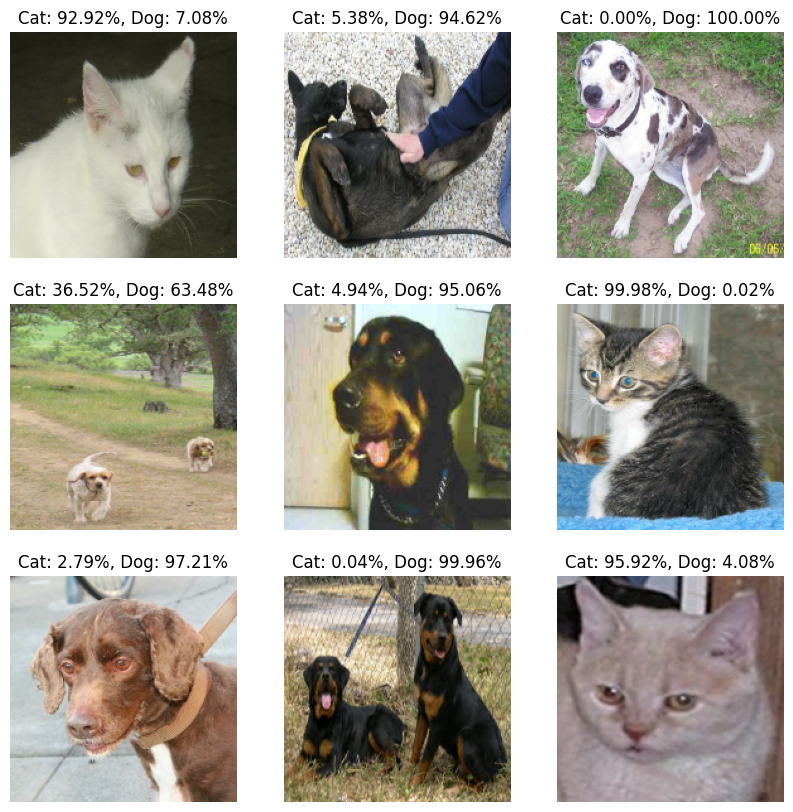

In [80]:
plt.figure(figsize=(10, 10))

for images, labels in test_ds.take(1): # take(1) obtiene un lote del conjunto de datos (128 ejemplos)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = modelo.predict(tf.expand_dims(images[i], 0))
        score = float(predictions[0])
        plt.title(f"Cat: {100 * (1 - score):.2f}%, Dog: {100 * score:.2f}%")
        plt.axis("off")

plt.show()

In [16]:
from PIL import Image
import numpy as np

# Cargar una imagen de prueba
image = Image.open("PetImages/Cat/9.jpg")
image = image.convert("RGB")
image = image.resize((180, 180))
image_array = np.array(image) / 255.0
image_ready = np.expand_dims(image_array, axis=0)

# Imprimir detalles de `image_ready`
print(f"Forma: {image_ready.shape}")
print(f"Rango de valores: min={image_ready.min()}, max={image_ready.max()}")

Forma: (1, 180, 180, 3)
Rango de valores: min=0.08235294117647059, max=0.9647058823529412


In [18]:
def preprocess_image(image: Image.Image, target_size=(180, 180)) -> np.ndarray:
    image = image.convert("RGB")
    image = image.resize(target_size)
    image_array = np.array(image)
    image_array = image_array / 255.0
    image_array = np.expand_dims(image_array, axis=0)
    image_array = image_array.astype('float32')
    return image_array
# Carga una imagen del conjunto de datos de entrenamiento y aplica el preprocesamiento
# Cambia "ruta/a/tu/imagen.jpg" a la ruta de una imagen específica que quieras probar
image_path = "PetImages/Cat/9.jpg"  # Ajusta la ruta de la imagen
image = Image.open(image_path)

# Aplica el preprocesamiento
image_ready = preprocess_image(image)

In [19]:
prediction = modelo.predict(image_ready)
print("Valor de la predicción en el notebook:", prediction)
predicted_class = "dog" if prediction[0][0] > 0.5 else "cat"
print("Clase predicha en el notebook:", predicted_class)


1/1 [==============================] - 1s 819ms/step
Valor de la predicción en el notebook: [[0.6876885]]
Clase predicha en el notebook: dog


In [20]:
for images, labels in train_ds.take(1):
    pred = modelo.predict(images)
    print(pred)

1/1 [==============================] - 0s 66ms/step
[[3.2991913e-01]
 [2.1820622e-03]
 [3.9387299e-03]
 [5.0910249e-02]
 [9.7911083e-04]
 [3.0036119e-03]
 [5.8888357e-02]
 [6.3363008e-02]
 [2.2417569e-01]
 [9.9928731e-01]
 [7.3087119e-02]
 [7.9252273e-01]
 [3.4216614e-03]
 [2.2154644e-01]
 [9.2436349e-01]
 [9.9898058e-01]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..221.8764].


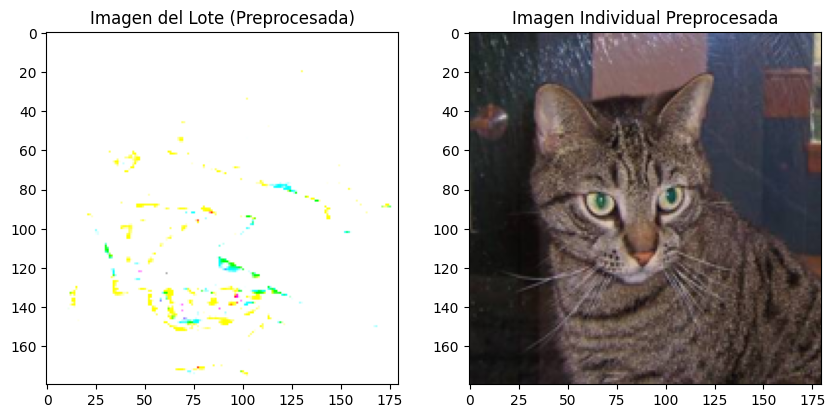

1/1 [==============================] - 0s 24ms/step
Predicción para imagen en lote: [[0.00277677]]
1/1 [==============================] - 0s 27ms/step
Predicción para imagen individual preprocesada: [[0.6873919]]


In [42]:
import numpy as np
import tensorflow as tf
from PIL import Image

# Función de preprocesamiento para la imagen cargada manualmente
def preprocess_image(image_path):
    image = Image.open(image_path).resize((180, 180))  # Abrir y redimensionar
    image = np.array(image)  # Convertir a arreglo NumPy
    image = tf.convert_to_tensor(image, dtype=tf.float32)  # Convertir a tensor
    image = image / 255.0  # Normalizar entre 0 y 1
    image = tf.expand_dims(image, axis=0)  # Añadir dimensión de lote
    return image

# Imagen cargada manualmente
ruta_imagen = "PetImages/Cat/1.jpg"  # Cambia esta ruta a una imagen real
imagen_individual_preprocesada = preprocess_image(ruta_imagen)

# Tomar una imagen y etiqueta del conjunto de entrenamiento (lote)
for images, labels in train_ds.take(1):
    imagen_lote = tf.expand_dims(images[0], axis=0)  # Selecciona la primera imagen del lote y añade dimensión de lote

# Visualizar las imágenes preprocesadas
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(imagen_lote[0])  # Mostrar la imagen del lote
axes[0].set_title("Imagen del Lote (Preprocesada)")
axes[1].imshow(imagen_individual_preprocesada[0])  # Mostrar la imagen cargada manualmente
axes[1].set_title("Imagen Individual Preprocesada")
plt.show()

# Predicción en la imagen del lote
pred_lote = modelo.predict(imagen_lote)
print("Predicción para imagen en lote:", pred_lote)

# Predicción en la imagen individual preprocesada
pred_individual = modelo.predict(imagen_individual_preprocesada)
print("Predicción para imagen individual preprocesada:", pred_individual)



Caso de aplicacion de transformacion a la imagen cargada manualmente coincidente con la realizada a las imagenes de entrenamiento

In [49]:
import os
import shutil
from tensorflow import keras
import tensorflow as tf
from pathlib import Path
from PIL import Image

# Ruta al dataset principal
DATASET_PATH = "PetImages"  # Ajusta esta ruta según tu ubicación real

# Crear una carpeta temporal
temp_dir = os.path.join(DATASET_PATH, "Temp")
os.makedirs(temp_dir, exist_ok=True)

# Copiar la imagen cargada manualmente a la carpeta temporal
ruta_imagen = "PetImages/Cat/1.jpg"  # Cambia esta ruta a la imagen que quieras usar
temp_image_path = os.path.join(temp_dir, "temp_image.jpg")
shutil.copy(ruta_imagen, temp_image_path)

# Cargar la imagen temporal con image_dataset_from_directory
temp_ds = keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    labels="inferred",
    label_mode=None,
    batch_size=1,
    image_size=(180, 180),
    shuffle=False,
    subset=None,
    seed=1337,
)

# Predicción en la imagen cargada desde la carpeta temporal
for temp_image in temp_ds.take(1):
    pred_individual = modelo.predict(temp_image)
    print("Predicción para imagen individual preprocesada:", pred_individual)

# Eliminar la carpeta temporal y su contenido
shutil.rmtree(temp_dir)




Found 23423 files belonging to 1 classes.
1/1 [==============================] - 0s 24ms/step
Predicción para imagen individual preprocesada: [[0.15681233]]


In [85]:
# preprocessing_module.py

import numpy as np
import tensorflow as tf
from typing import Tuple

# Definimos los formatos de imagen permitidos
ALLOWLIST_FORMATS = (".bmp", ".gif", ".jpeg", ".jpg", ".png")

def preprocess_image_manually(
    image_path: str,
    image_size: Tuple[int, int] = (256, 256),
    color_mode: str = "rgb",
    interpolation: str = "bilinear",
    crop_to_aspect_ratio: bool = False,
    pad_to_aspect_ratio: bool = False,
) -> tf.Tensor:
    """
    Preprocesses a manually loaded image to match transformations typically applied by
    `tf.keras.utils.image_dataset_from_directory`.

    Parameters:
    -----------
    image_path : str
        The path to the image file.
    image_size : Tuple[int, int], optional
        The target size for resizing the image in (width, height) format. Defaults to (256, 256).
    color_mode : str, optional
        The desired color mode. Options are "rgb", "rgba", or "grayscale". Defaults to "rgb".
    interpolation : str, optional
        The interpolation method for resizing. Options include "bilinear", "nearest", etc.
        Defaults to "bilinear".
    crop_to_aspect_ratio : bool, optional
        If True, crops the image to maintain the aspect ratio during resizing.
        Defaults to False.
    pad_to_aspect_ratio : bool, optional
        If True, pads the image to maintain the aspect ratio during resizing.
        Cannot be used simultaneously with `crop_to_aspect_ratio`. Defaults to False.

    Returns:
    --------
    tf.Tensor
        A 4D tensor of shape (1, image_size[0], image_size[1], channels) containing the processed image.

    Raises:
    -------
    ValueError
        If `image_path` is in an unsupported format, or if `color_mode` is not one of the accepted values,
        or if both `pad_to_aspect_ratio` and `crop_to_aspect_ratio` are set to True.
    """
    
    # Verificar el formato de la imagen
    if not image_path.lower().endswith(ALLOWLIST_FORMATS):
        raise ValueError(f"Formato de imagen no soportado. Formatos permitidos: {ALLOWLIST_FORMATS}")

    # Determinar número de canales
    if color_mode == "rgb":
        num_channels = 3
    elif color_mode == "rgba":
        num_channels = 4
    elif color_mode == "grayscale":
        num_channels = 1
    else:
        raise ValueError(f"color_mode debe ser 'rgb', 'rgba', o 'grayscale'. Recibido: {color_mode}")
    
    # Cargar y decodificar la imagen
    img = tf.io.read_file(image_path)
    img = tf.image.decode_image(img, channels=num_channels, expand_animations=False)
    
    # Validar que no se usen ambas opciones de aspecto al mismo tiempo
    if pad_to_aspect_ratio and crop_to_aspect_ratio:
        raise ValueError("Solo uno de `pad_to_aspect_ratio` o `crop_to_aspect_ratio` puede estar activado.")

    # Redimensionar y ajustar el aspecto según las opciones dadas
    if crop_to_aspect_ratio:
        img = tf.image.resize(img, image_size, method=interpolation)
    elif pad_to_aspect_ratio:
        img = tf.image.resize_with_pad(img, image_size[0], image_size[1], method=interpolation)
    else:
        img = tf.image.resize(img, image_size, method=interpolation)
    
    # Asegurar que el tamaño de la imagen es consistente
    img.set_shape((image_size[0], image_size[1], num_channels))

    # Añadir dimensión de batch para compatibilidad con modelos
    img = tf.expand_dims(img, axis=0)

    return img


In [90]:
preprocessed_image = preprocess_image_manually("PetImages/Dog/9.jpg", image_size=(180, 180), color_mode="rgb")
# Agregar una dimensión extra para que tenga la forma de batch

In [91]:
# Predicción en la imagen del lote
pred_lote = modelo.predict(imagen_lote)
print("Predicción para imagen en lote:", pred_lote)

# Predicción en la imagen individual preprocesada
pred_individual = modelo.predict(preprocessed_image)
print("Predicción para imagen individual preprocesada:", pred_individual)

1/1 [==============================] - 0s 26ms/step
Predicción para imagen en lote: [[0.32991916]]
1/1 [==============================] - 0s 21ms/step
Predicción para imagen individual preprocesada: [[0.99316835]]
